# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./SINASC_RO_2019.csv')
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [29]:
cat_apgar5 = df[['APGAR5']]
cat_apgar5.loc[(cat_apgar5['APGAR5'] >= 0) & (cat_apgar5['APGAR5'] <= 3), 'apgar5_cat'] = 'Asfixia grave'
cat_apgar5.loc[(cat_apgar5['APGAR5'] >= 4) & (cat_apgar5['APGAR5'] <= 5), 'apgar5_cat'] = 'Asfixia moderada'
cat_apgar5.loc[(cat_apgar5['APGAR5'] >= 6) & (cat_apgar5['APGAR5'] <= 7), 'apgar5_cat'] = 'Asfixia leve'
cat_apgar5.loc[(cat_apgar5['APGAR5'] >= 8) & (cat_apgar5['APGAR5'] <= 10), 'apgar5_cat'] = 'Normal'

cat_apgar5 = cat_apgar5['apgar5_cat']
cat_apgar5.value_counts()

Normal              26463
Asfixia leve          320
Asfixia grave          74
Asfixia moderada       68
Name: apgar5_cat, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

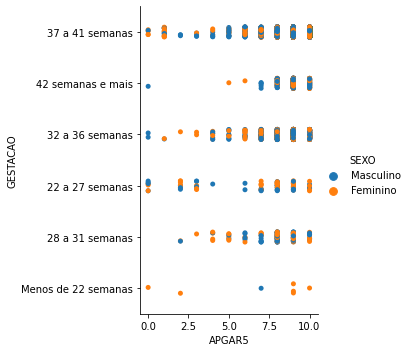

In [43]:
sns.catplot(x='APGAR5', y='GESTACAO', hue='SEXO', data=df)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [46]:
freq = pd.crosstab(df['GESTACAO'], df['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [311]:
freq_pct = freq.div(freq.sum(axis=1), axis=0)
pd.DataFrame(freq_pct)

ax1 = freq_pct.loc['22 a 27 semanas':'32 a 36 semanas']
ax2 = freq_pct.loc['Menos de 22 semanas'].to_frame()
ax2 = ax2.T
ax = ax2.append(ax1)

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

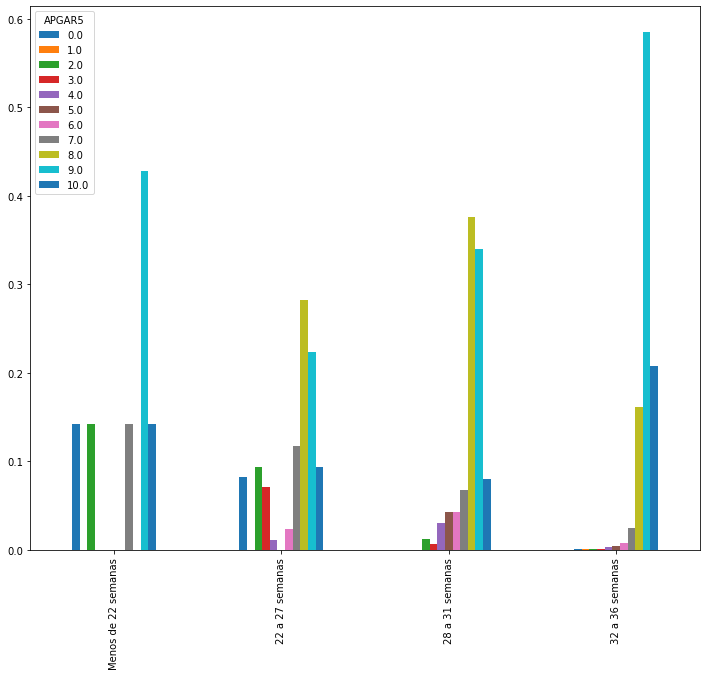

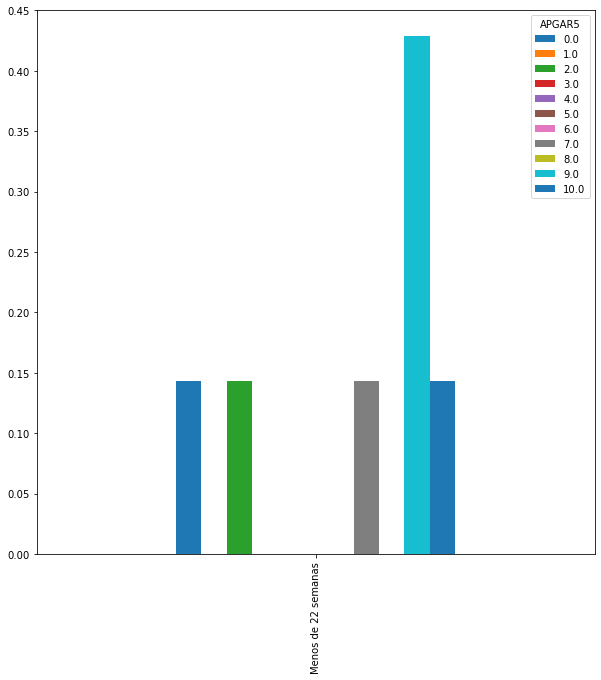

In [310]:
gest_prem = ax.plot.bar(figsize=(12,10))
gest_super_prem = ax2.plot.bar(figsize=(10,10))

In [316]:
###O bebê ser prematuro de fato pode gerar a um nível de APGAR5 mais baixo, mas não como via de regra. Existem outros motivos que podem ser decisivos neste fator, como PESO por exemplo.


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

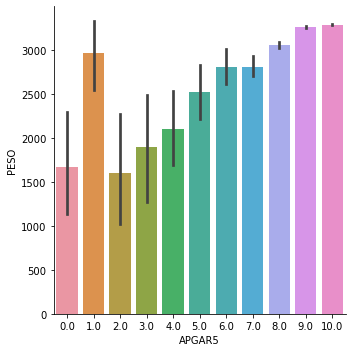

In [309]:
sns.catplot(x='APGAR5'
            , y='PESO'
            , kind='bar'
            , data=df
           )